In [106]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [110]:
save_dir = "images"
frcnn_vgg = np.loadtxt("data/run_faster_rcnn_vgg.csv",delimiter=",",skiprows=1)
frcnn_resnet = np.loadtxt("data/run_faster_rcnn_resnet101.csv",delimiter=",",skiprows=1)
rfcn_resnet101 = np.loadtxt("data/run_rfcn_resnet10.csv",delimiter=",",skiprows=1)
ssd_vgg = np.loadtxt("data/run_ssd_vgg.csv",delimiter=",",skiprows=1)
ssd_resnet = np.loadtxt("data/run_ssd_resnet.csv",delimiter=",",skiprows=1)

In [111]:
smooth = lambda x: savgol_filter(x,33,polyorder=3)

Created images/lfw-accuracy.png


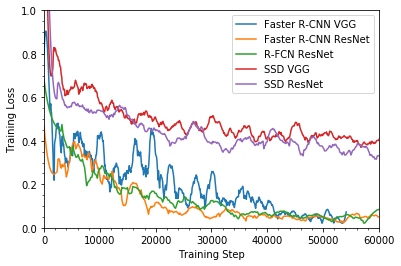

In [112]:
fig = plt.figure()
plt.plot(frcnn_inception[:,1], smooth(frcnn_inception[:,2]))
plt.plot(frcnn_resnet[:,1],    smooth(frcnn_resnet[:,2]))
plt.plot(rfcn_resnet101[:,1],  smooth(rfcn_resnet101[:,2]))
plt.plot(ssd_inception[:,1],   0.2*smooth(ssd_inception[:,2]))
plt.plot(ssd_mobilenet[:,1],   0.2*smooth(ssd_mobilenet[:,2]))

plt.xlabel("Training Step")
plt.ylabel("Training Loss")
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=60000)
#plt.grid(b=True, which='major', color='k', linestyle='-')
#plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.legend([
    "Faster R-CNN VGG",
    "Faster R-CNN ResNet",
    "R-FCN ResNet",
    "SSD VGG",
    "SSD ResNet",
])

save_path = os.path.join(save_dir, "lfw-accuracy.png")
fig.savefig(save_path)
print("Created {}".format(save_path))

plt.show()